In [3]:
"""
owl-trainer v 0.0.1 
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [5]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


In [6]:
#targets = f(x,z) = w1*x - w2*z + scalar + noise
noise = np.random.uniform(-1, 1, (observations, 1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


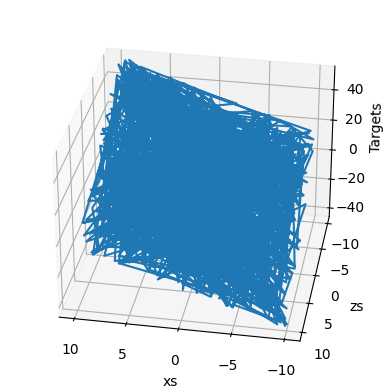

In [13]:
targets = targets.reshape(observations,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xs, zs, targets)
ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("Targets")
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)


In [ ]:
# linear model: targets, t = y = xw + b
init_range = 0.1 # initial range gradient descent
weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=1)